# Create Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [2]:
def create_feature_matrix(sample_size, n_features, x_min, x_max):
    #create sample_size*n_features with x_min and x_max
    #put this features in a 1x2 vector 
    finalNpArray = []
    
    #ihc kann eine range schleife eerstellen die in jedem durchgang ein np array mit n feature vectros erstellt
    for i in range(sample_size):
        x = 0
        x = np.random.uniform(x_min, x_max, n_features)
        x = x.tolist()
        finalNpArray.append(x)
    arr = np.array(finalNpArray)
        
    return arr
    
    raise NotImplementedError("You should implement this!")

In [3]:
sample_size = 100
n_features = 2
x_min = [1.5, -0.5]
x_max = [11., 5.0]

X = create_feature_matrix(sample_size, n_features, x_min, x_max)
X

array([[ 8.68074611e+00,  3.43009044e+00],
       [ 7.04437166e+00,  4.88724719e+00],
       [ 1.00906643e+01,  1.12780447e+00],
       [ 6.51713016e+00,  1.62988125e+00],
       [ 6.36379186e+00,  2.17749287e+00],
       [ 7.89480134e+00,  3.51753319e+00],
       [ 6.37044110e+00,  2.18407597e+00],
       [ 2.93988353e+00,  4.92702367e+00],
       [ 6.78300459e+00,  4.68840752e+00],
       [ 4.72247239e+00,  4.38365594e+00],
       [ 1.02804779e+01,  5.44637817e-01],
       [ 1.08446905e+01,  5.09884415e-02],
       [ 1.08948064e+01,  4.80326756e+00],
       [ 8.59883009e+00,  2.94032391e+00],
       [ 8.67362756e+00,  1.40726400e+00],
       [ 4.15137881e+00,  2.42107909e+00],
       [ 8.59762750e+00,  3.15357375e+00],
       [ 6.47495276e+00,  4.17835993e+00],
       [ 6.84852297e+00,  7.98480194e-04],
       [ 3.65644104e+00,  4.07539783e+00],
       [ 9.78763724e+00,  2.85980310e+00],
       [ 2.18112778e+00,  3.31557793e+00],
       [ 7.00826709e+00,  3.96143964e+00],
       [ 3.

In [4]:
assert len(X[:,0]) == sample_size
assert len(X[0,:]) == n_features
for i in range(n_features):
    assert np.max(X[:,i]) <= x_max[i]
    assert np.min(X[:,i]) >= x_min[i]

# Linear Hypothesis

In [5]:
def linear_hypothesis(thetas):
    return lambda x: np.sum(thetas*np.insert(x, 0, 1, axis=1), axis=1)
    ''' Combines given list argument in a linear equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a linear function based on thetas and x
    '''
    raise NotImplementedError("You should implement this!")

In [6]:
linearHypothesisLambda = linear_hypothesis([.1,.2,.3])

linearHypothesisLambda(X)

array([2.86517635, 2.97504849, 2.4564742 , 1.89239041, 2.02600623,
       2.73422022, 2.02931101, 2.16608381, 2.86312318, 2.35959126,
       2.31948693, 2.28423463, 3.71994154, 2.70186319, 2.25690471,
       1.65659949, 2.76559763, 2.64849853, 1.46994414, 2.05390756,
       2.91546838, 1.53089894, 2.69008531, 1.7542124 , 1.0372084 ,
       1.50947193, 1.83824394, 0.93466682, 2.03110273, 1.06464379,
       1.22438755, 0.98955883, 1.6522583 , 2.55772163, 1.1587256 ,
       2.12440251, 2.13728347, 2.11073759, 2.42081866, 2.78330311,
       3.00038368, 3.14646528, 2.60176951, 1.90708181, 1.7228087 ,
       3.22925652, 2.42936837, 0.47103392, 2.44732476, 2.66659558,
       1.72316692, 2.42338794, 1.48194157, 2.16219474, 1.87309806,
       3.15431551, 2.79438609, 0.77795253, 1.65119   , 2.38325324,
       3.09284674, 3.27348083, 2.52619926, 3.22317649, 2.36221775,
       1.5265071 , 1.64737294, 2.54561961, 1.16299324, 1.74001665,
       2.28166146, 1.61938568, 2.51980805, 1.89177182, 1.54780

In [7]:
assert (len(linear_hypothesis([.1,.2,.3])(X))) == sample_size

# Generate Target Values

In [8]:
def generate_targets(X, theta, sigma):
    #y = das ergebnis meiner linear hypothesis
    #was ist gaussian noise?
    lH = linear_hypothesis(theta)(X)
    noise = np.random.normal(0, sigma, lH.shape)
    y = lH+noise
    return y
    ''' Combines given arguments in a linear equation with X, 
    adds some Gaussian noise and returns the result
    
    Args:
        X: 2D numpy feature matrix
        theta: list of coefficients
        sigma: standard deviation of the gaussian noise
        
    Returns:
        target values for X
    '''
    raise NotImplementedError("You should implement this!")

In [9]:
theta = (2., 3., -4.)
#why do we use here so much noise?
sigma = 3.
y = generate_targets(X, theta, sigma)
print(y)

[ 12.84592562   1.74650576  27.50868514  14.815713    19.09282839
  14.03417904  17.43867673 -10.78476603   3.85026913  -1.02467058
  35.21672388  38.17572693  17.1669379   20.72374267  23.17196203
   5.76161836  14.7108534    1.81301569  25.35925625  -8.64600716
  20.2942421   -4.14021054   5.78804033   2.96438275   5.69929084
  16.61557761  -0.39646516  13.49617423  20.02949801  20.37693405
  25.45052438   2.23389046  25.04050718  18.8225945    4.75612048
  23.7742858   22.16291813  32.73390377  21.07490413  30.58588099
   5.72820479  13.58732053  20.19420291 -15.451589    10.53207018
  22.95169052  11.51563995   6.53964767  32.40709439   3.40138815
  15.07026432  24.51711505   3.04691285  -1.49291381  32.59508742
  19.01185204  25.26375148  13.46109103 -17.16339651  -6.22987479
   9.73719154   8.46957811  10.13196178  25.2826623   -5.02508408
   5.62058881  21.69819701   0.83454869  23.53161445   9.70305728
  21.8770681   15.79620066  20.13624121  -5.3737776   19.71169709
  12.24967

In [10]:
assert len(y) == sample_size

# Plot the data

In [11]:
%matplotlib notebook
import random

def plot_data_scatter(features, targets):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = Axes3D(fig)
    ax.scatter(features[:,0], features[:,1], targets)
    return plt.show()
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    raise NotImplementedError("You should implement this!")

<IPython.core.display.Javascript object>


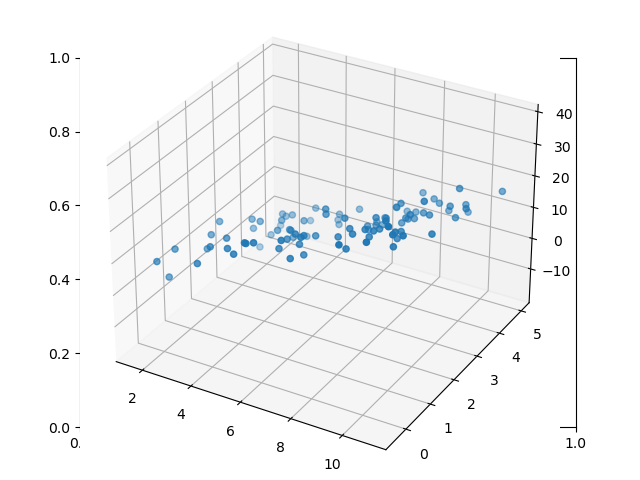

In [12]:
plot_data_scatter(X, y) 

# Cost Function

In [13]:
def mse_cost_function(x, y):   
    return lambda theta: 1/(2*(len(x)))*(sum((linear_hypothesis(theta)(x)-y)**2))
    ''' Implements MSE cost function as a function J(theta) on given traning data 
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta) that models the cost function
    '''
    raise NotImplementedError("You should implement this!")

In [14]:
print(mse_cost_function(X, y)(theta))


4.180048867621342


# Gradient Descent

In [15]:
def update_theta2(x, y, theta, learning_rate):
    x2 = x
    numbers = []
    for i in theta:
        numbers.append(i)
    x2 = np.insert(x2, 0, 1, axis=1)
    for i in range(len(x2)):
        for j in range(len(numbers)):
            numbers[j] = numbers[j] - (learning_rate * ((1 / 1*len(x))* (sum((linear_hypothesis(theta)(x)-y)*x2[i][j]))))
    return numbers

In [16]:
def update_theta(x, y, theta, learning_rate):
    x2 = x
    numbers = []
    for i in theta:
        numbers.append(i)
    x2 = np.insert(x2, 0, 1, axis=1)
    for j in range(len(numbers)):
        for i in range(len(x2)):
            temp = sum((linear_hypothesis(theta)(x)-y)*x2[i][j])
        numbers[j] = numbers[j] - (learning_rate * temp)
    return numbers

            

In [17]:
print(update_theta(X, y, theta, 0.0003))

[2.0115503198784155, 3.0781538860813797, -3.9892302468736722]


In [18]:
def gradient_descent(learning_rate, theta, iterations, x, y, cost_function):
    cost_hist = []
    theta_hist = []
    for i in range(iterations):
        theta = update_theta(x, y, theta, learning_rate)
        theta_hist.append(theta)
        cost_hist.append(cost_function(x, y)(theta))
    return cost_hist, theta_hist
    ''' Minimize theta values of a linear model based on MSE cost function
    Args:
        learning_rate: scalar, scales the negative gradient 
        theta: initial theta values
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    raise NotImplementedError("You should implement this!")

In [19]:
# Your implementation:
t0 = np.random.random()
t1 = np.random.random()
t2 = np.random.random()
alpha = 0.0001# assign an appropriate value
nb_iterations = 100# assign an appropriate value
start_values_theta = [t0, t1, t2] # assign appropriate values
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y,  mse_cost_function)

In [20]:
def plot_progress(costs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = plt.plot(np.linspace(0, len(costs), len(costs)), costs)
    ax = plt.xlabel('Iterations')
    ax =  plt.ylabel('Cost')
    ax = plt.title('Cost Curve')
    
    
    return plt.show()

<IPython.core.display.Javascript object>


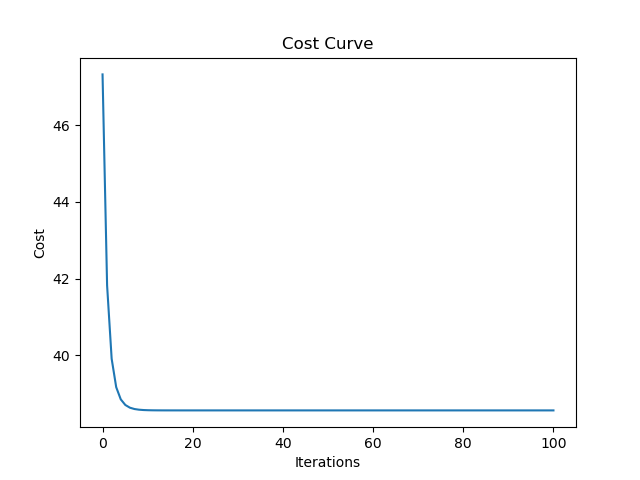

None
costs before the training:	  47.32259627553725
costs after the training:	  38.56824325197475


In [21]:
print(plot_progress(history_cost))
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

In [22]:
def evaluation_plt(x, y, final_theta):
    #y = np.array(y)
    #final_theta = np.array(final_theta)
    fig = plt.figure()
    ax = Axes3D(fig)
    #ax.scatter(x[:,0], x[:,1], y)
    new = final_theta[1:]
    z = new * x
    z = np.array(z)
    x = np.array(x)
    ax.plot_surface(x,x, z)
    return plt.show()
    ''' Plots the data x, y together with the final model
    
    Args:
        cost_hist: vector, history of all cost values from a opitmization
        theta_0: scalar, model parameter for boundary
        theta_1: scalar, model parameter for boundary
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''
    raise NotImplementedError("You should implement this!") 

<IPython.core.display.Javascript object>


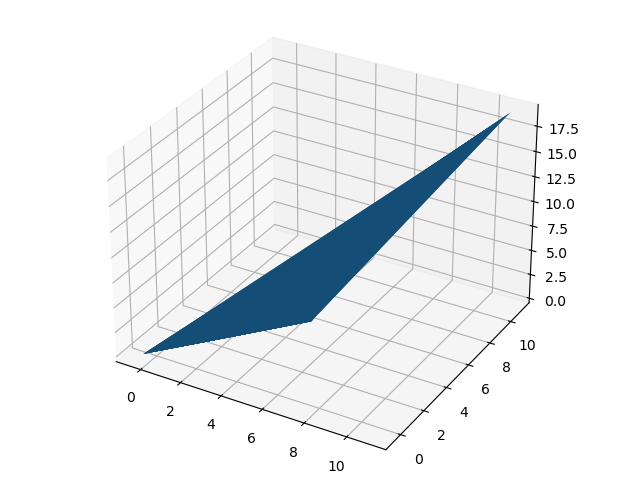

thetas before the training:	 [0.9269409274324458, 1.3434095556729155, 0.11441421331059268]
thetas after the training:	 [0.9871367777301872, 1.7507177234348321, 0.17054204818965418]


In [23]:
evaluation_plt(X, y, history_theta[-1])
print("thetas before the training:\t", history_theta[0])
print("thetas after the training:\t", history_theta[-1])

# Pen and Paper (also send as separate file on paper)

In [24]:
from sklearn.preprocessing import StandardScaler


X = np.array([[0.0001, 2000],
       [0.0002, 1800],
       [0.0003, 1600]], dtype=np.float32)

scaled = StandardScaler()

X = scaled.fit_transform(X)
print(X)

[[-1.2247448e+00  1.2247449e+00]
 [-8.9111907e-08  0.0000000e+00]
 [ 1.2247449e+00 -1.2247449e+00]]
